In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
try:
    from sklearn.feature_selection import VarianceThreshold
except:
    pass

from sklearn.ensemble import RandomForestClassifier

santandar_data = pd.read_csv(r"/content/train.csv", nrows=40000)
santandar_data.shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(40000, 371)

In [ ]:
x=santandar_data.drop('TARGET',axis=1)
y=santandar_data['TARGET']
x

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,...,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var8_ult1,saldo_medio_var8_ult3,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,saldo_medio_var13_largo_hace2,saldo_medio_var13_largo_hace3,saldo_medio_var13_largo_ult1,saldo_medio_var13_largo_ult3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var17_ult1,saldo_medio_var17_ult3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var29_ult1,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,...,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.18,3.00,2.07,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,0.0,195.0,195.0,0.0,0.0,195.0,0.0,0.0,195.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.00,91.56,138.84,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0.30,40501.08,13501.47,0.0,0.0,0.0,0.0,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,8066,2,30,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.99,3.00,2.34,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64767.240000
4028,8067,2,69,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,...,2040.00,15.00,690.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,63000.0,20322.57,63000.0,48774.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
 x_train, x_test,y_train,y_test=train_test_split(x,y,
    test_size=0.2,
    random_state=0)

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)
x_train.shape

(3225, 370)

In [ ]:
constant_filter.get_support().sum()  #these are non const features this filter returns non const features

266

In [ ]:
constant_list = [not temp for temp in constant_filter.get_support()]
constant_list #true for which features are const

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 

In [ ]:
x.columns[constant_list]

Index(['ind_var2_0', 'ind_var2', 'ind_var6_0', 'ind_var6', 'ind_var13_medio_0',
       'ind_var13_medio', 'ind_var18_0', 'ind_var18', 'ind_var27_0',
       'ind_var28_0',
       ...
       'saldo_var2_ult1', 'saldo_medio_var13_medio_hace2',
       'saldo_medio_var13_medio_hace3', 'saldo_medio_var13_medio_ult1',
       'saldo_medio_var13_medio_ult3', 'saldo_medio_var17_hace3',
       'saldo_medio_var29_hace2', 'saldo_medio_var29_hace3',
       'saldo_medio_var29_ult1', 'saldo_medio_var29_ult3'],
      dtype='object', length=104)

In [ ]:
x_train_filter = constant_filter.transform(x_train)
x_test_filter = constant_filter.transform(x_test)

x_train_filter.shape,x_test_filter.shape

((3225, 266), (807, 266))

In [ ]:
#quassi cinstant removal#

In [ ]:
quassi_constant_filter = VarianceThreshold(threshold=0.01)

In [ ]:
quassi_constant_filter.fit(x_train_filter)

VarianceThreshold(threshold=0.01)

In [ ]:
quassi_constant_filter.get_support().sum()
266-233 #233 are non quassi const features 

33

In [ ]:
x_train_quassi_filter =quassi_constant_filter.transform(x_train_filter)
x_test_quassi_filter=quassi_constant_filter.transform(x_test_filter)

In [ ]:
x_train_quassi_filter.shape , x_test_quassi_filter.shape

((3225, 233), (807, 233))

In [ ]:
###REmove duplicate features#####

In [ ]:
x_train_T =x_train_quassi_filter.T
x_test_T = x_test_quassi_filter.T

In [ ]:
x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

In [ ]:
x_train_T.shape

(233, 3225)

In [ ]:
duplicated_features=x_train_T.duplicated()
duplicated_features_test=x_test_T.duplicated()

In [ ]:
x_train_T.duplicated().sum() , x_test_T.duplicated().sum()       #gives duplicated features

(18, 63)

In [ ]:
features_to_keep =[not index for index in duplicated_features]

In [ ]:
x_train_unique = x_train_T[features_to_keep].T
x_tst_unique = x_train_T[features_to_keep].T

In [ ]:
x_train_unique.shape , x_train.shape

((3225, 215), (3225, 370))

In [ ]:
 #######CORELATION######

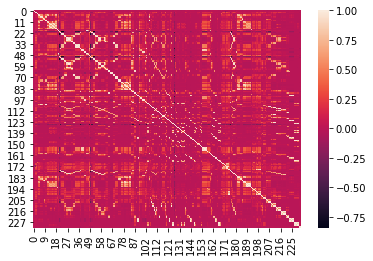

In [102]:
corrmat = x_train_unique.corr()
corrmat
sns.heatmap(corrmat)

In [106]:
def get_correlation(data,threshold):
  corr_col = set()
  corrmat = data.corr()
  for i in range(len(corrmat.columns)):
      for j in range(i):
         if abs(corrmat.iloc[i,j])> threshold:
            colname=corrmat.columns[i]
            corr_col.add(colname)
  return corr_col    


In [107]:
corr_features = get_correlation(x_train_unique, 0.85)
corr_features

{5,
 7,
 10,
 16,
 17,
 18,
 24,
 28,
 29,
 30,
 33,
 35,
 36,
 38,
 40,
 42,
 46,
 47,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 60,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 72,
 75,
 76,
 80,
 81,
 82,
 83,
 84,
 86,
 87,
 88,
 93,
 95,
 97,
 100,
 102,
 103,
 106,
 112,
 116,
 118,
 120,
 121,
 122,
 125,
 133,
 136,
 139,
 141,
 143,
 144,
 147,
 149,
 152,
 154,
 155,
 156,
 157,
 162,
 163,
 164,
 165,
 167,
 168,
 174,
 176,
 177,
 178,
 179,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 190,
 191,
 192,
 193,
 197,
 199,
 200,
 207,
 208,
 211,
 212,
 213,
 215,
 216,
 218,
 219,
 220,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231}